In [1]:
import os
import sys
sys.path.append("../")
from models.unet import UNetDiffusion, UNet_diffusion_normal, UNet_diffusion_sample, UNet_diffusion_mixednormal, UNet_diffusion_mvnormal
from data.datasets import PDE1D
import torch
from models.diffusion import Diffusion, generate_diffusion_samples_low_dimensional, DistributionalDiffusion
import matplotlib.pyplot as plt
import numpy as np

device = "cuda"

In [ ]:
temp = 2
test_dataset = PDE1D(
    data_dir="data/",
    pde="Burgers",
    var="val",
    downscaling_factor=4,
    normalize=True,
    last_t_steps=2,
    temporal_downscaling_factor=temp
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=5,
    shuffle=True,
    num_workers=0,
)

target_dim, input_dim = (
    (1, *test_dataset.get_dimensions()),
    (3, *test_dataset.get_dimensions()),
)
grid = test_dataset.get_coordinates()[0]

In [36]:
n_test = len(test_dataset)
indices = np.random.choice(n_test, 3, replace=False)
input = []
target = []
trajectory = []
for idx in indices:
    target_tensor, input_tensor = test_dataset.get_trajectory(idx, length = 200)
    target_tensor = target_tensor.unsqueeze(0).to(device)
    input_tensor = input_tensor.unsqueeze(0).to(device)
    input.append(input_tensor)
    target.append(target_tensor[:,:,0]-input_tensor[:,-2])
    trajectory.append(target_tensor)
input = torch.cat(input, dim=0)
target = torch.cat(target, dim=0)
trajectory = torch.cat(trajectory, dim=0).cpu()

In [ ]:
input_tensor.shape

torch.Size([1, 3, 256])

: 

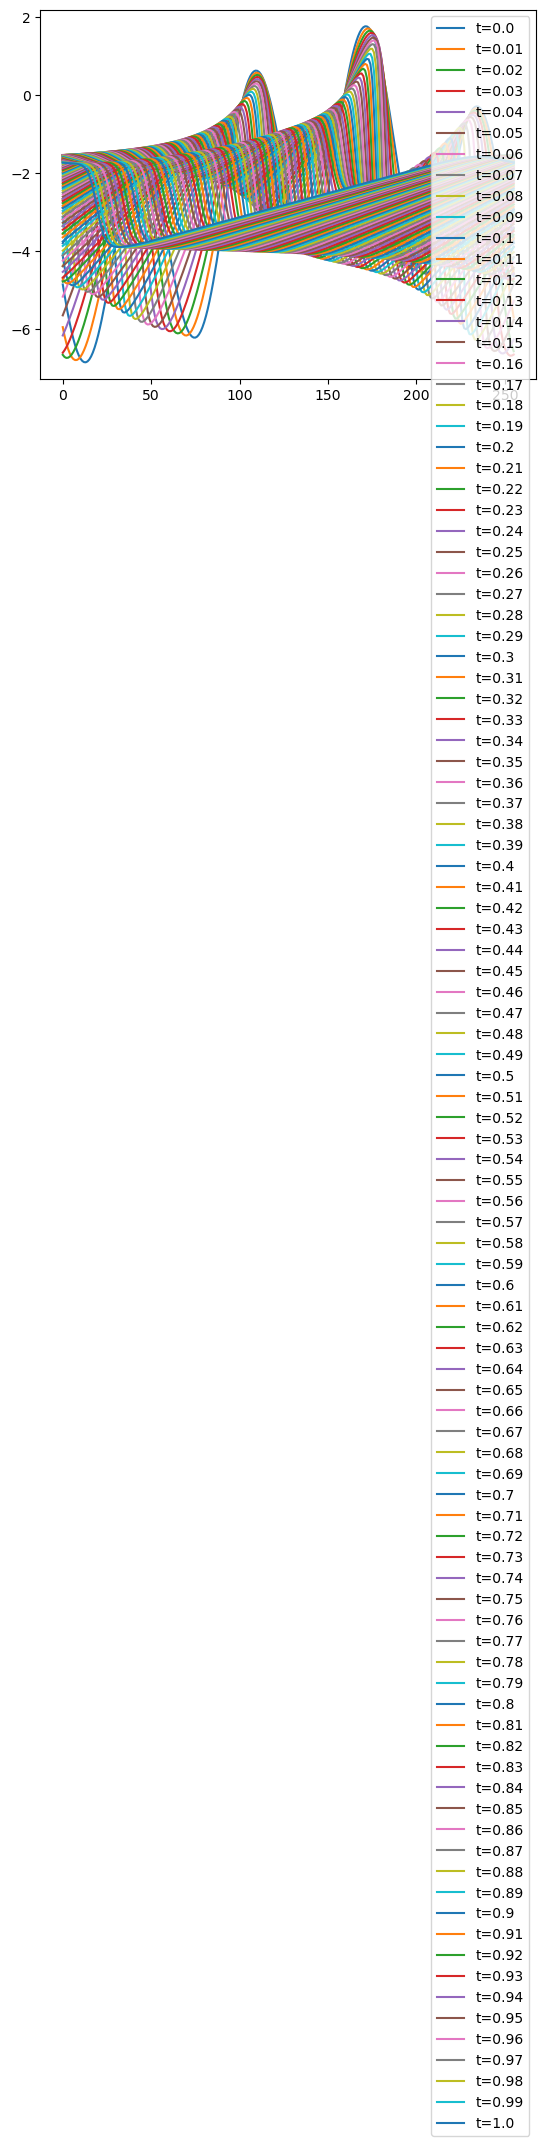

In [37]:
t_steps = trajectory.shape[2]
for i in range(t_steps):
    plt.plot(trajectory[0,0,i], label = f"t={(2*i)/(200//temp)}")
plt.legend(loc = "best")

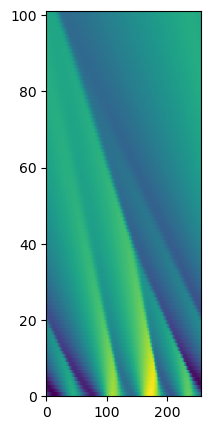

In [38]:
fig, axs = plt.subplots(1,1, figsize = (2,5))
axs.pcolormesh(trajectory[0,0])